### Text Analysis
    Find out the most frequently used words, bigramd , and trigrams 

In [1]:

import numpy as np
import pandas as pd
import re
import string
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
# from google.colab import files  # this code is for when using colab
# uploaded = files.upload()


### Read content from parenting 

In [8]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['combine_25.csv']))
df = pd.read_csv('../data/parenting_combine_50.csv')

In [9]:
df.shape

(10000, 11)

In [10]:
df.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Parenting,u35fhw,We recently found a drop in daycare for my 3yr...,Daycare recommends shorter drop offs.,0.0,1649898505,fromsubmission,fromsubmission,fromsubmission,fromsubmission,We recently found a drop in daycare for my 3yr...
1,Parenting,u355wz,So I've lurked on this sub for a long time as ...,Looking for advice for taking the leap to beco...,0.0,1649897684,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So I've lurked on this sub for a long time as ...
2,Parenting,u34x24,So my 20yr old son came back to live with me a...,lazy teenager,0.0,1649896924,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So my 20yr old son came back to live with me a...
3,Parenting,u34vh5,"I feel bad about posting, since I had all the ...",I still haven't bonded with my 1 year old,0.0,1649896790,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I feel bad about posting, since I had all the ..."
4,Parenting,u34sai,My Steam library is looking a bit thin when it...,PC game advice for a 5 year old.,0.0,1649896511,fromsubmission,fromsubmission,fromsubmission,fromsubmission,My Steam library is looking a bit thin when it...


In [11]:
df.isnull().sum()

subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

### add more stop words for better analysis

In [112]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS
,
add_stop_words = ['fromcomments','2fr','posts','human','compose','10','webp','ncsu','crap','pray', 'survey', 'png','www','x200b', 'reddit', 'nih', 'gov','qualtrics', 'sure','new','reach','comment','comments', 'post', 'contribute','contributed','moderator', 'auto', 'content', 'redd', 'fromsubmission','modmail','amp','https', 'removed','having','really','said','does','message','automatically', 'manually', 'moderators','moderation', 'https','com','things','meet','illuminate','went','sweep','did','2fparenting','violation', 'didn','just' ,'like','doe','ll', 'way','good','don','know','time', 'doesn','think','told', 'thanks','getting','ve' ,'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# stop_words

### Use CountVectorizer to analyze text content pf parenting group

In [13]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(1, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [14]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['able', 'advice', 'age', 'ask', 'asked', 'away', 'baby', 'bad', 'bed', 'best', 'better', 'bit', 'care', 'child', 'children', 'come', 'dad', 'daughter', 'day', 'days', 'different', 'doing', 'eat', 'family', 'father', 'feel', 'food', 'friends', 'gets', 'girl', 'great', 'hard', 'help', 'home', 'hours', 'house', 'husband', 'kid', 'kids', 'leave', 'let', 'life', 'little', 'long', 'looking', 'lot', 'love', 'make', 'maybe', 'mom', 'month', 'months', 'mother', 'need', 'needs', 'night', 'normal', 'old', 'parent', 'parenting', 'parents', 'people', 'play', 'point', 'pretty', 'right', 'room', 'say', 'saying', 'says', 'school', 'situation', 'sleep', 'son', 'start', 'started', 'stop', 'talk', 'tell', 'thing', 'thought', 'times', 'today', 'toddler', 'tried', 'try', 'trying', 'use', 'want', 'wanted', 'wants', 'week', 'weeks', 'wife', 'won', 'work', 'wrong', 'year', 'year old', 'years']


### Top 25 words

In [16]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(25)

kids        3709
old         3455
son         2906
want        2874
child       2773
year        2630
daughter    2558
baby        2494
feel        2282
school      2072
kid         2016
parents     2012
help        2011
day         1904
year old    1754
home        1719
make        1710
husband     1678
work        1656
need        1609
mom         1553
say         1426
little      1355
family      1271
months      1268
dtype: int64

In [17]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,kids,old,son,want,child,year,daughter,baby,feel,school,...,home,make,husband,work,need,mom,say,little,family,months
Count,3709,3455,2906,2874,2773,2630,2558,2494,2282,2072,...,1719,1710,1678,1656,1609,1553,1426,1355,1271,1268


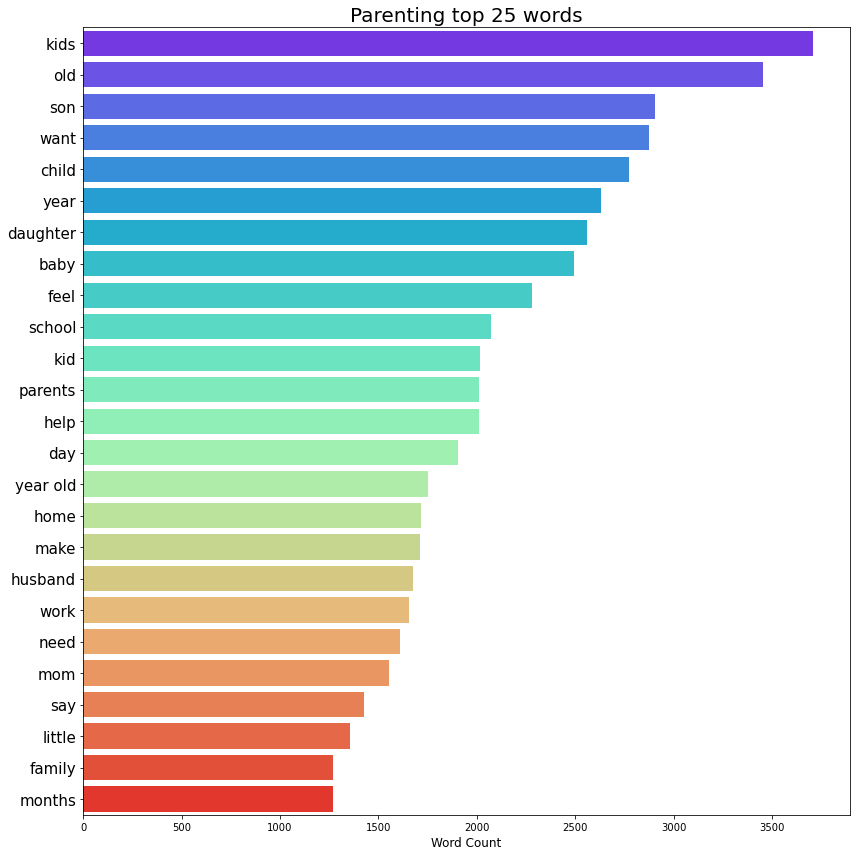

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

### top 25 bigram

In [22]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(2, 2)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [23]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['12 year', '13 year', '18 month', '18 months', '30 minutes', 'advice appreciated', 'age appropriate', 'baby girl', 'best friend', 'big deal', 'birthday party', 'brush teeth', 'came home', 'car seat', 'child child', 'child mother', 'child support', 'come home', 'comments feel', 'comments meet', 'couple months', 'couple weeks', 'day day', 'days ago', 'days week', 'doing wrong', 'elementary school', 'fall asleep', 'falls asleep', 'fast forward', 'feel bad', 'feel better', 'feel comfortable', 'feel guilty', 'gentle parenting', 'gets upset', 'greatly appreciated', 'high school', 'home mom', 'home office', 'home school', 'hours day', 'ice cream', 'kids age', 'kids kids', 'kids want', 'little bit', 'little boy', 'little girl', 'living room', 'long story', 'long term', 'looking advice', 'lot people', 'love hear', 'make feel', 'makes feel', 'mental health', 'middle night', 'middle school', 'mom dad', 'month old', 'months ago', 'months old', 'multiple times', 'need advice', 'need help', 'old ba

In [24]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

year old              1754
month old              517
years old              251
months old             228
old daughter           209
old son                183
stay home              136
mental health          135
yr old                 128
need help              126
potty training         121
feel bad               118
years ago              115
year olds              107
months ago             101
little girl             99
birthday party          94
need advice             94
weeks ago               89
big deal                86
work home               84
high school             84
car seat                82
days week               78
little bit              75
old boy                 75
makes feel              75
looking advice          74
video games             74
fall asleep             73
long term               69
wits end                69
want make               68
social media            66
advice appreciated      65
taking care             65
mom dad                 65
b

In [25]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,year old,month old,years old,months old,old daughter,old son,stay home,mental health,yr old,need help,...,little girl,birthday party,need advice,weeks ago,big deal,work home,high school,car seat,days week,little bit
Count,1754,517,251,228,209,183,136,135,128,126,...,99,94,94,89,86,84,84,82,78,75


In [26]:
print(word_freq.index)

Index(['year old', 'month old', 'years old', 'months old', 'old daughter',
       'old son', 'stay home', 'mental health', 'yr old', 'need help',
       'potty training', 'feel bad', 'years ago', 'year olds', 'months ago',
       'little girl', 'birthday party', 'need advice', 'weeks ago', 'big deal',
       'work home', 'high school', 'car seat', 'days week', 'little bit'],
      dtype='object')


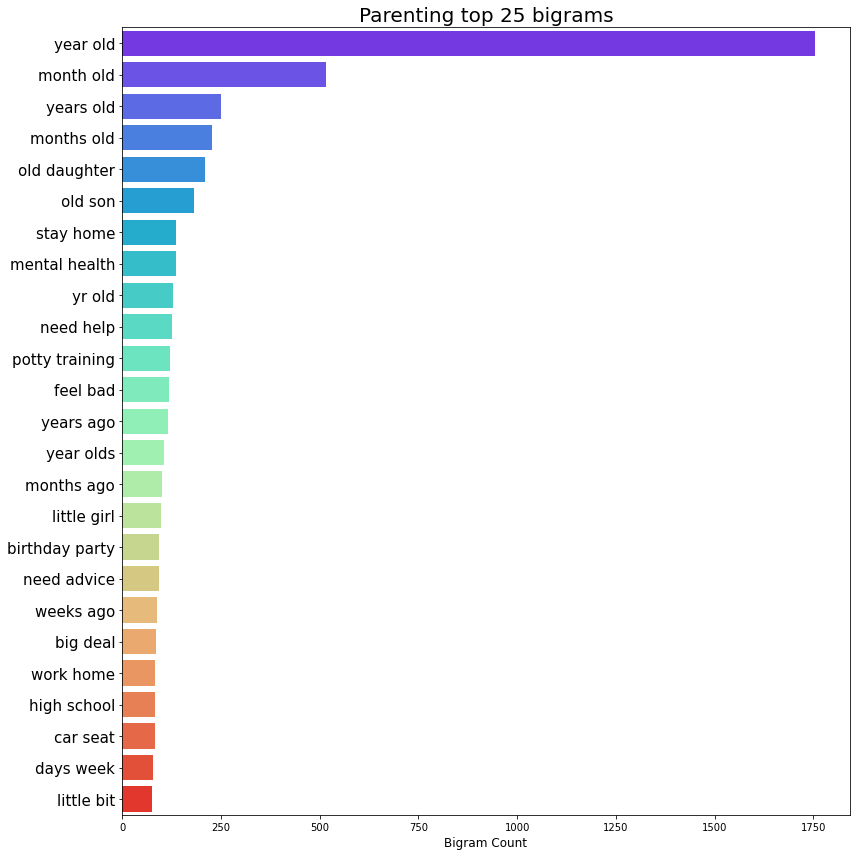

In [27]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 bigrams',fontsize=20)
plt.xlabel('Bigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

###  Top 25 trigrams

In [113]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(3, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [114]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['11 month old', '11 months old', '11 year old', '12 year old', '13 year old', '14 month old', '14 year old', '15 month old', '15 year old', '16 month old', '16 year old', '17 year old', '18 month old', '18 months old', '18 year old', '20 month old', 'advice greatly appreciated', 'advice year old', 'askparents finally everybody', 'changes child life', 'check wiki resources', 'child child relative', 'community direct result', 'community help parenting', 'direct result rule', 'discord gg z88nvyj2vr', 'discord server discord', 'draw line able', 'feel harsh need', 'feel spirit community', 'harm crisis situations', 'harsh need draw', 'help parenting standards', 'help year old', 'kids year old', 'larger longer original', 'legally appointed guardians', 'life feel harsh', 'living child child', 'local welfare services', 'long story short', 'long term relationships', 'longer original topic', 'makes parent guardian', 'medical legal advice', 'mental health issues', 'moderate sub non', 'month old b

In [115]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

year old daughter             150
year old son                  134
year old boy                   53
12 year old                    50
13 year old                    46
year old girl                  43
18 month old                   42
long story short               40
feel spirit community          38
report feel spirit             38
parenting standards report     38
longer original topic          38
help parenting standards       38
direct result rule             38
community help parenting       38
community direct result        38
questions rely community       38
rely community help            38
rule simply larger             38
result rule simply             38
larger longer original         38
simply larger longer           38
spirit community direct        38
standards report feel          38
stay home mom                  37
11 year old                    34
month old baby                 33
old year old                   32
16 year old                    30
month old daug

In [116]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,year old daughter,year old son,year old boy,12 year old,13 year old,year old girl,18 month old,long story short,feel spirit community,report feel spirit,...,community direct result,questions rely community,rely community help,rule simply larger,result rule simply,larger longer original,simply larger longer,spirit community direct,standards report feel,stay home mom
Count,150,134,53,50,46,43,42,40,38,38,...,38,38,38,38,38,38,38,38,38,37


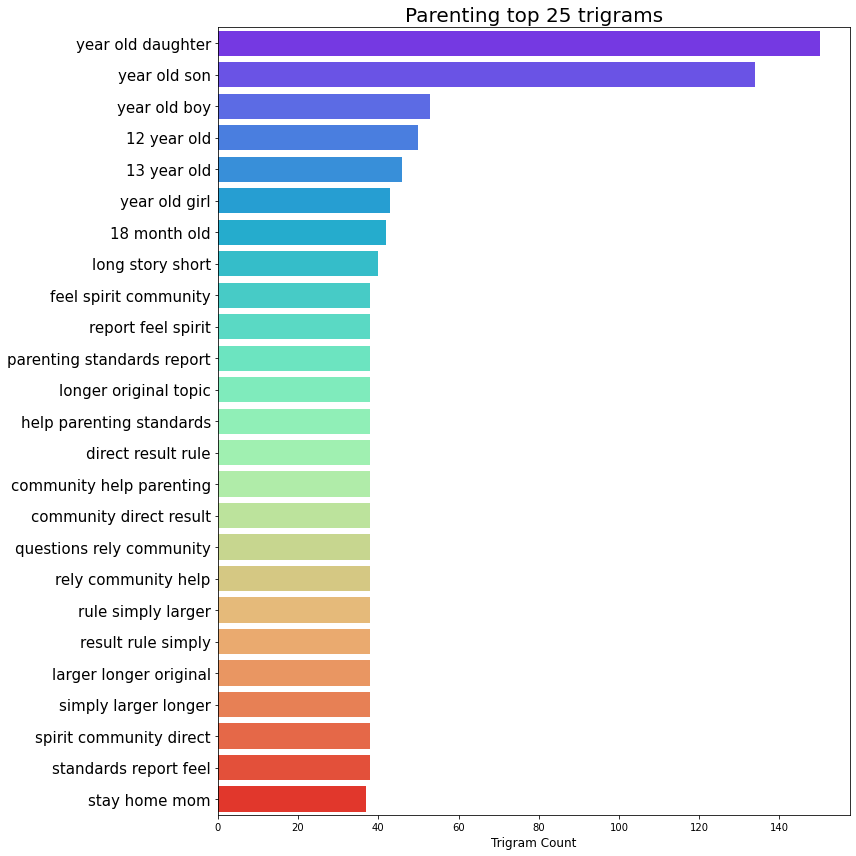

In [117]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 trigrams',fontsize=20)
plt.xlabel('Trigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

### Sentimenment analysis

In [118]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [119]:
df['sentiment'] = df['all_text'].apply(detect_sentiment)

(array([  13.,   38.,  147.,  348., 1753., 5622., 1502.,  398.,   98.,
          81.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

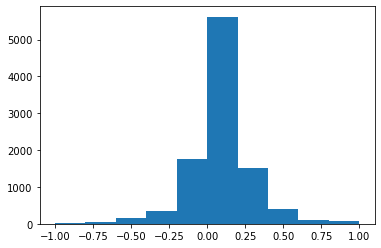

In [120]:
plt.hist(df['sentiment'])

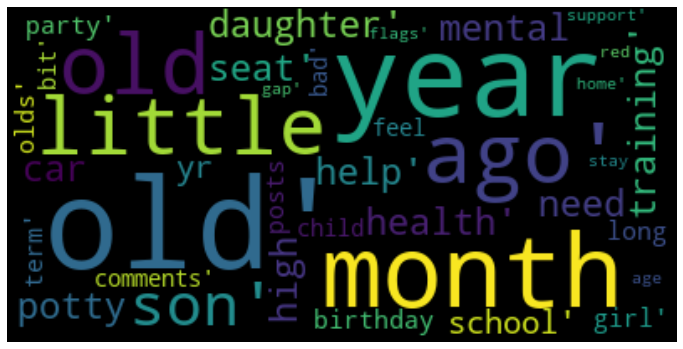

In [121]:
# Start with one review:
from wordcloud import WordCloud

text = " 'year old', 'month old', 'years old', 'old son', 'months old', 'old daughter', 'mental health', 'need help', 'potty training','car seat', 'high school', 'yr old', 'birthday party', 'years ago','year olds', 'little girl', 'long term', 'posts comments', 'feel bad','little bit', 'child support', 'stay home', 'age gap', 'red flags','months ago' "
#print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()